In [1]:
!python -m pip install multiple-hypothesis-testing

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [3]:
from Synthetic_Data_Generators import Multi_Class_Normal_Population as Data_Generator
from Synthetic_Data_Generators import Two_Lists_Tuple, Data_Generator_Base
from Higher_Criticism import Higher_Criticism
higher_criticism = Higher_Criticism(use_import=False)

In [4]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'


Working on sample size: 1000


100%|██████████| 10/10 [01:07<00:00,  6.75s/it]


Working on sample size: 2000


100%|██████████| 10/10 [01:26<00:00,  8.63s/it]


Working on sample size: 3000


100%|██████████| 10/10 [01:47<00:00, 10.72s/it]


Working on sample size: 5000


100%|██████████| 10/10 [02:23<00:00, 14.31s/it]


Working on sample size: 6000


100%|██████████| 10/10 [02:42<00:00, 16.24s/it]


Working on sample size: 7000


100%|██████████| 10/10 [02:59<00:00, 17.97s/it]


Working on sample size: 8000


100%|██████████| 10/10 [03:17<00:00, 19.76s/it]


Working on sample size: 10000


100%|██████████| 10/10 [03:58<00:00, 23.83s/it]


Working on sample size: 20000


100%|██████████| 10/10 [06:47<00:00, 40.79s/it]


Working on sample size: 30000


100%|██████████| 10/10 [09:16<00:00, 55.66s/it]


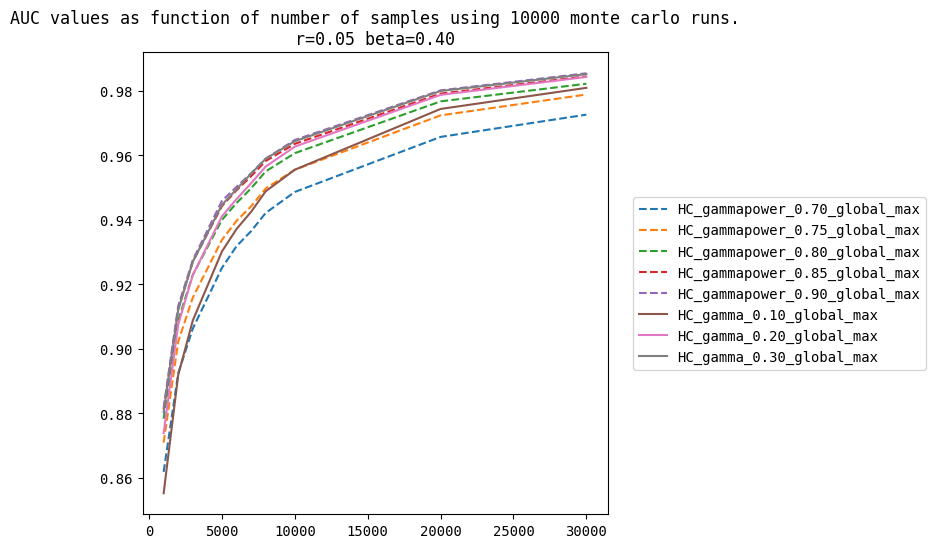

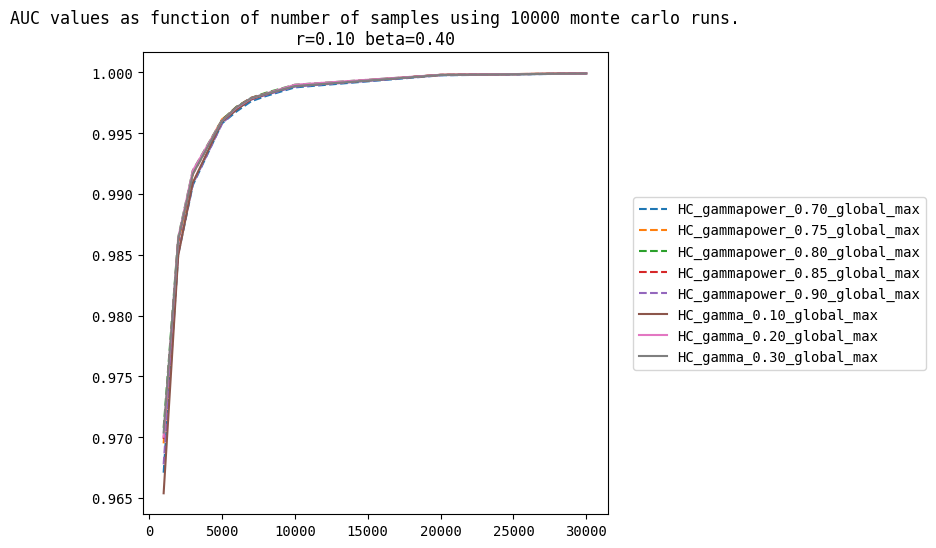

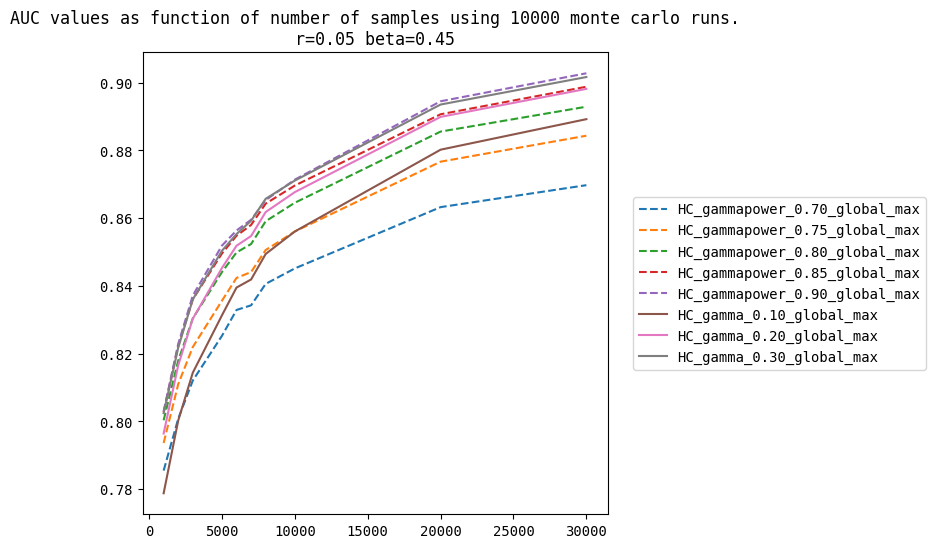

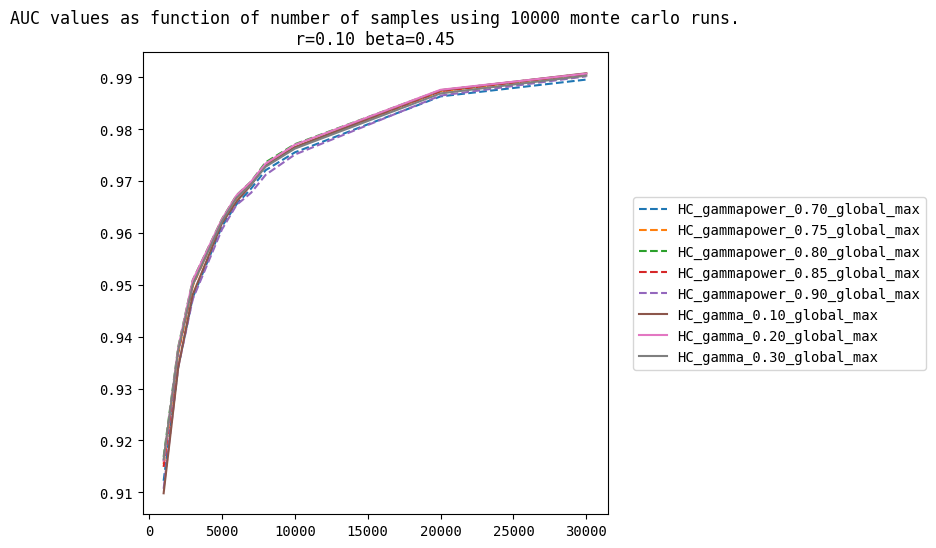

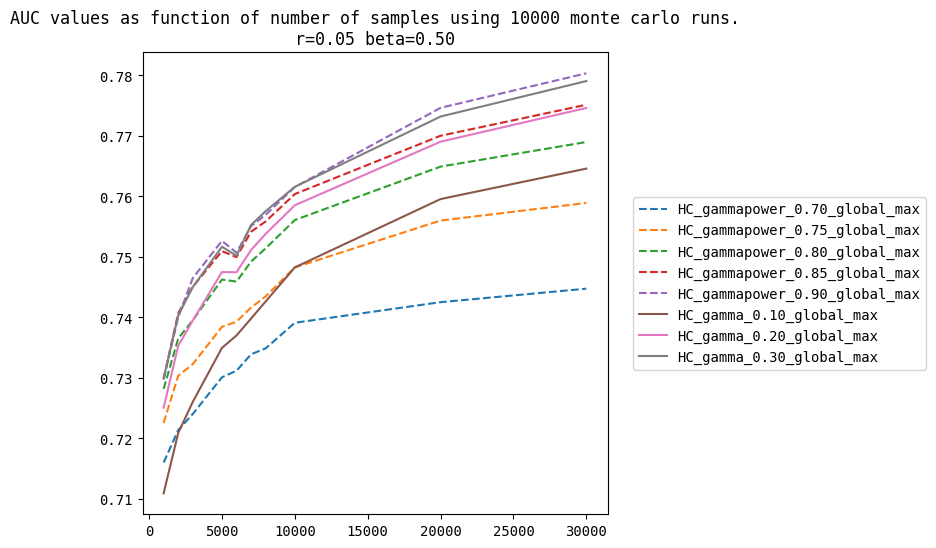

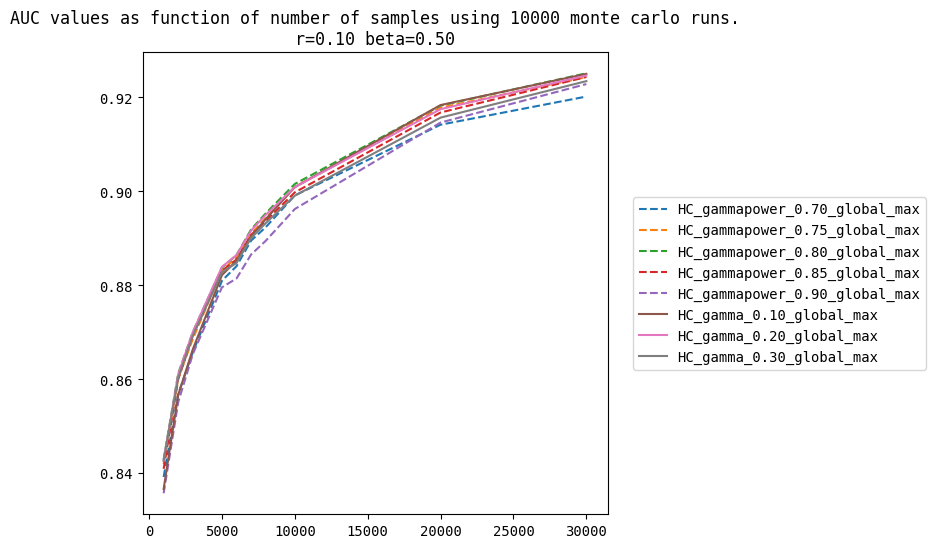

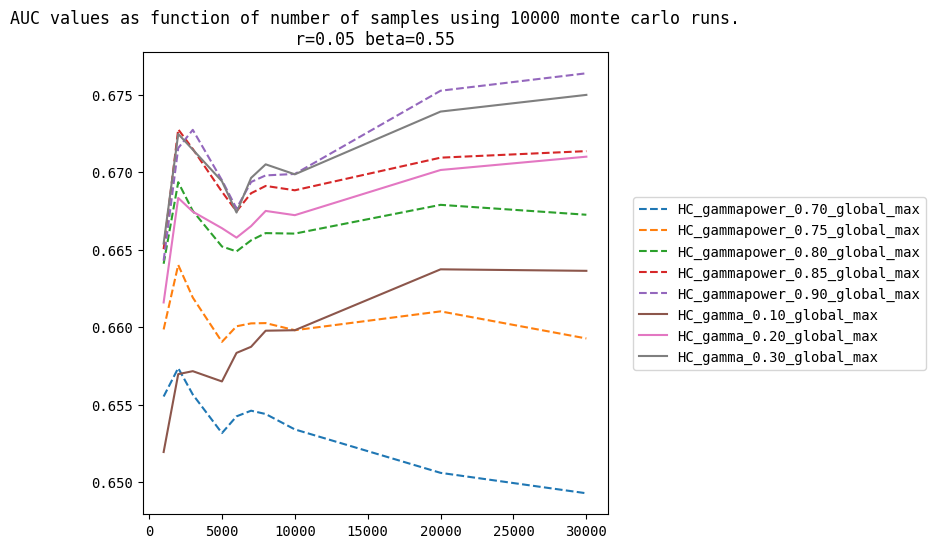

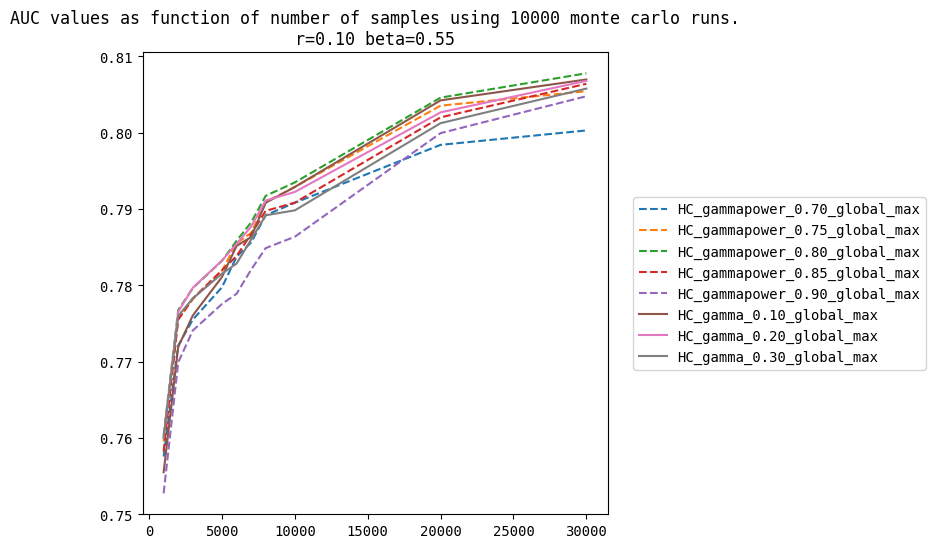

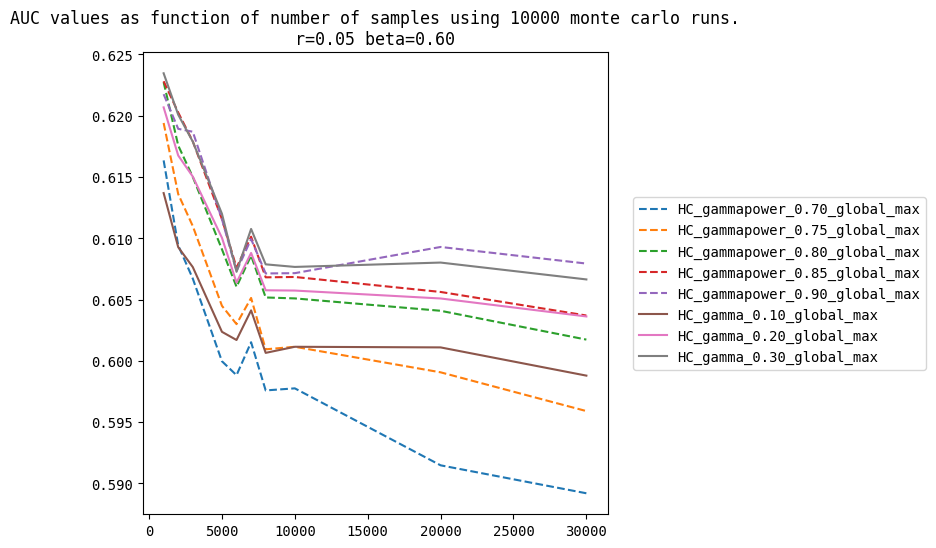

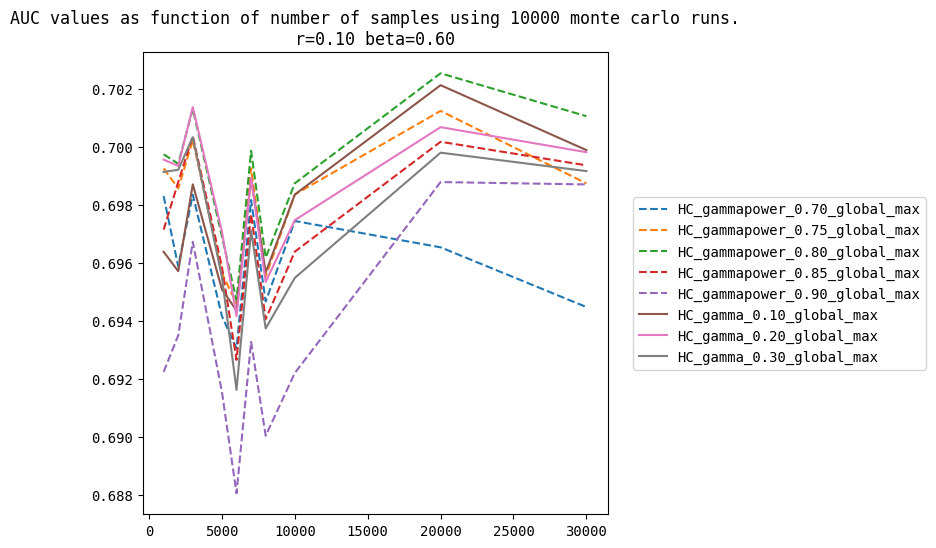

In [18]:
monte_carlo=10000
N_range = [1000, 2000, 3000, 5000, 6000, 7000, 8000, 10000, 20000, 30000]
r_range = [0.05, 0.1]  # , 0.7, 1.0, 1.3, 1.7, 2.0]
beta_range = [0.4, 0.45, 0.5, 0.55, 0.6]
collect_results = {}
hc_models = [Higher_Criticism(global_max=True, gamma_power=gamma) for gamma in np.linspace(0.7,0.9,5)]
hc_models += [Higher_Criticism(global_max=True, gamma=gamma) for gamma in np.linspace(0.1,0.3,3)]

params_list = Two_Lists_Tuple(list(enumerate(beta_range)), list(enumerate(r_range)))
many_params = len(params_list) > 1
for ind_N, N in enumerate(N_range):
    print(f'Working on sample size: {N}')
    noise_generator = Data_Generator_Base(N)
    noise_values = Higher_Criticism.monte_carlo_best_objectives(hc_models=hc_models, data_generator=noise_generator, monte_carlo=monte_carlo, disable_tqdm=many_params)
    for (ind_beta, beta), (ind_r, r) in tqdm(params_list, disable= not many_params):
        signal_generator = Data_Generator(**Data_Generator.params_from_N_r_beta(N=N, r=r, beta=beta))
        hc_monte_carlo = Higher_Criticism.monte_carlo_statistics_HC(hc_models=hc_models, noise_values=noise_values, data_generator=signal_generator, disable_tqdm=many_params)
        for key, auc in hc_monte_carlo.items():
            if key not in collect_results:
                collect_results[key] = np.empty(shape=(len(N_range),len(r_range),len(beta_range)), dtype=np.float32)
            collect_results[key][ind_N, ind_r, ind_beta] = auc

for (ind_beta, beta), (ind_r, r) in params_list:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    for key in collect_results:
        auc = collect_results[key][:, ind_r, ind_beta].reshape(-1)
        ax.plot(N_range, auc, label=key, linestyle='dashed' if 'power' in key else 'solid')
        #ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_title(f'AUC values as function of number of samples using {monte_carlo} monte carlo runs.\n' + f'r={r:.2f} beta={beta:.2f}')
    ax.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
    plt.show()
